<br><font color = "#CC3D3D">
## Ensemble Learning ##

#### Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=0)

<font color = "#CC3D3D">
### Ensemble with different models

### Voting ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')
# hard -> voting, soft -> averaging
# soft 방법이 일반적인 보팅방법

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

### Averaging predictions

In [ ]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

In [ ]:
averaging.fit(X_train, y_train).score(X_test, y_test)

### Stacking 

In [ ]:
#!pip install mlxtend

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
svm = SVC()
mlp = MLPClassifier(alpha=1)

In [ ]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

### Boosting
- AdaBoost(Adaptive Boosting)
- Gradient Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

<font color='#CC3D3D'>
### Performance evaluation of ensemble methods

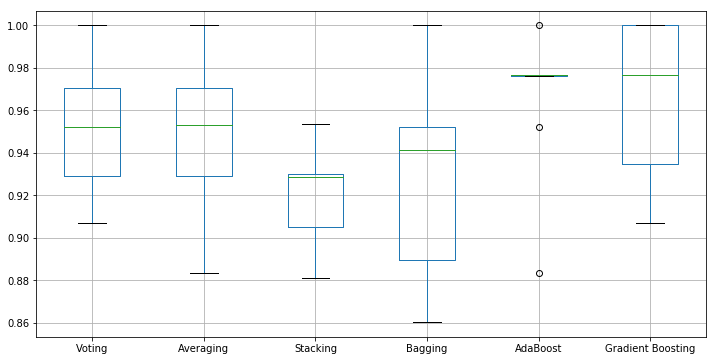

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()